/Users/zachary/miniconda3/envs/mel-gen/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dataset loaded. Len of dataset: 10013
Sample contents of dataset:
prompt: Generate an up-tempo female vocal rock melody.


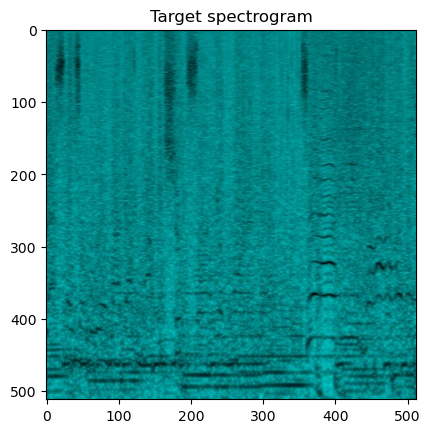

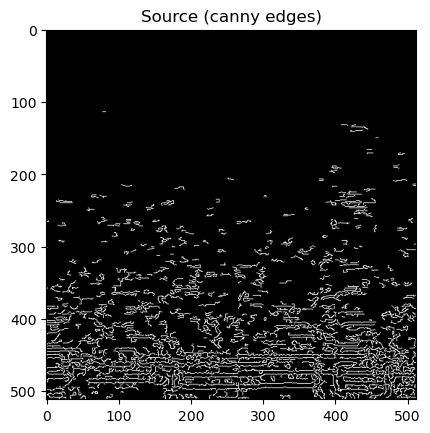

In [1]:
from cnet_riff_dataset import CnetRiffDataset
import matplotlib.pyplot as plt

# load training dataset and see if contents are as expected
train_dataset = CnetRiffDataset("train-data/")
print(f"Dataset loaded. Len of dataset: {len(train_dataset)}")
print("Sample contents of dataset:")
item = train_dataset[0]
plt.imshow((item['jpg'] + 1 )/ 2)
plt.title("Target spectrogram")
plt.figure()
plt.imshow(item['hint'])
plt.title("Source (canny edges)")
print("prompt:", item['txt'])
plt.show()

In [2]:
from torch.utils.data import DataLoader
import numpy as np
from cldm.logger import ImageLogger

batch_size = 1
dataloader = DataLoader(train_dataset, num_workers=0, batch_size=batch_size, shuffle=True)

# make logger and model trainer
logger = ImageLogger(batch_frequency=1)

/Users/zachary/miniconda3/envs/mel-gen/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:258: LightningDeprecationWarning: `pytorch_lightning.utilities.distributed.rank_zero_only` has been deprecated in v1.8.1 and will be removed in v2.0.0. You can import it from `pytorch_lightning.utilities` instead.
  rank_zero_deprecation(


{'jpg': tensor([[[[-0.8745,  0.1294,  0.1216],
          [-0.8902,  0.1137,  0.1059],
          [-0.8980,  0.0902,  0.0824],
          ...,
          [-0.9765,  0.0510,  0.0118],
          [-0.9529,  0.0745,  0.0353],
          [-0.9451,  0.0980,  0.0588]],

         [[-0.9765,  0.0275,  0.0196],
          [-0.9765,  0.0275,  0.0196],
          [-0.9608,  0.0275,  0.0196],
          ...,
          [-1.0000,  0.0275, -0.0118],
          [-1.0000,  0.0275, -0.0118],
          [-1.0000,  0.0353, -0.0039]],

         [[-1.0000, -0.0275, -0.0353],
          [-1.0000, -0.0510, -0.0588],
          [-1.0000, -0.0824, -0.0902],
          ...,
          [-1.0000, -0.0588, -0.0980],
          [-1.0000, -0.0588, -0.0980],
          [-1.0000, -0.0510, -0.0902]],

         ...,

         [[-1.0000,  0.2706,  0.2235],
          [-1.0000,  0.2549,  0.2078],
          [-1.0000,  0.2471,  0.2078],
          ...,
          [-1.0000,  0.1686,  0.1608],
          [-0.9686,  0.2078,  0.2000],
          [-0.

Sample contents of dataset:
prompt: ['Generate a female vocal pop melody that copies the rhythm of the electric keyboard.']


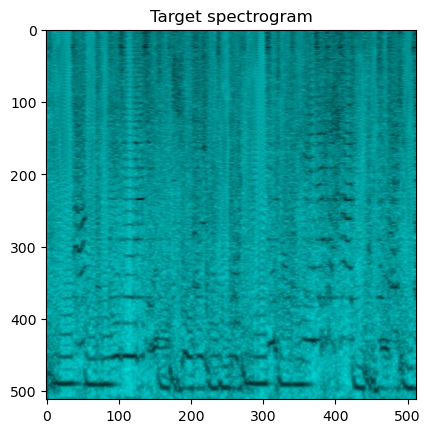

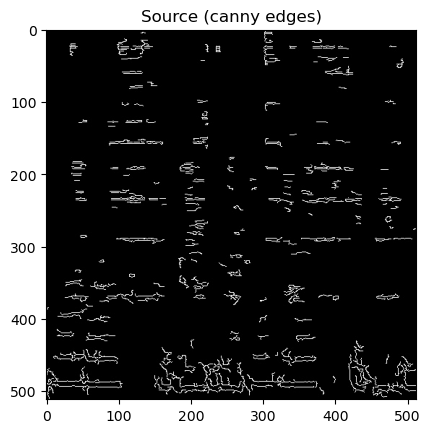

In [48]:
i = 0
for item in dataloader:
    break

print("Sample contents of dataset:")
plt.imshow((item['jpg'].squeeze() + 1 )/ 2)
plt.title("Target spectrogram")
plt.figure()
plt.imshow(item['hint'].squeeze() )
plt.title("Source (canny edges)")
print("prompt:", item['txt'])

torch.Size([1, 512, 512, 3])


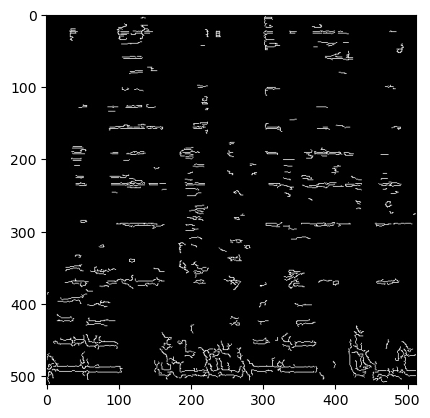

In [49]:
images = torch.Tensor(item['hint'])
plt.imshow(images.squeeze())
print(images.shape)

Text(0.5, 1.0, 'After clamp')

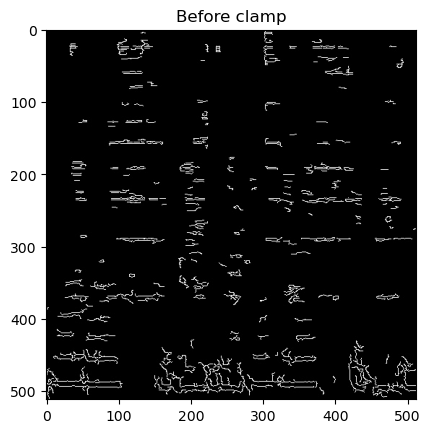

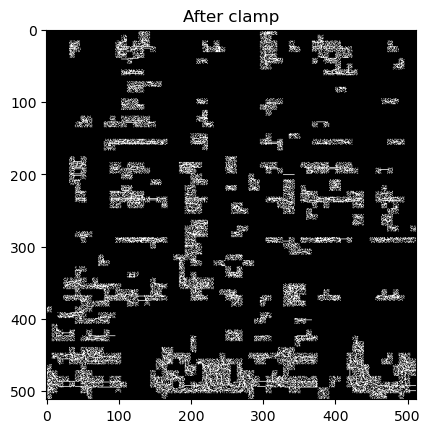

In [50]:
import torch
import torchvision
import os

k = 0
root = "test_logger"
if isinstance(images, torch.Tensor):
    images = images.detach().cpu()
    plt.imshow(images.squeeze()); plt.title("Before clamp")
    images = torch.clamp(images, -1., 1.)

plt.figure()
plt.imshow(images.squeeze()); plt.title("After clamp")

# for k in images:
#         grid = torchvision.utils.make_grid(images[k], nrow=4)
#         grid = (grid + 1.0) / 2.0  # -1,1 -> 0,1; c,h,w
#         grid = grid.transpose(0, 1).transpose(1, 2).squeeze(-1)
#         grid = grid.numpy()
#         grid = (grid * 255).astype(np.uint8)
#         filename = "test_logger.png"
#         path = os.path.join(root, filename)
#         os.makedirs(os.path.split(path)[0], exist_ok=True)
#         final_img = Image.fromarray(grid)
#         final_img.save(path)

# plt.imshow(final_img.squeeze()); plt.title("After clamp")
